In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras.preprocessing import sequence

In [2]:
df = pd.read_csv('emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
df.shape

(2132, 2549)

Text(0.5,0,'Class Label')

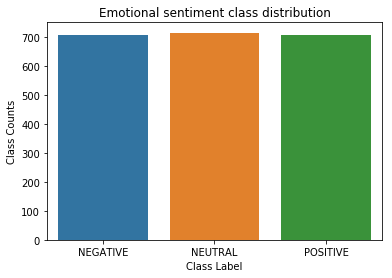

In [4]:
plt.figure()
sns.countplot(x=df.label)
plt.title('Emotional sentiment class distribution')
plt.ylabel('Class Counts')
plt.xlabel('Class Label')

In [5]:
correlations = df.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
mean_d_0_a,-0.000665,-0.088608,0.015122,-0.117748,-0.017196,1.000000,-0.520816,0.289196,0.424223,0.263961,...,0.036257,0.001320,0.007608,0.007608,0.001320,0.024944,0.002976,-0.017169,-0.017169,0.002976
mean_d_1_a,0.105961,-0.007586,0.014605,0.124462,-0.007570,-0.520816,1.000000,-0.299949,0.274802,-0.087698,...,-0.051368,-0.006839,-0.024373,-0.024373,-0.006839,-0.043387,-0.001477,0.003350,0.003350,-0.001477
mean_d_2_a,-0.061046,-0.050463,-0.004320,-0.175592,0.025546,0.289196,-0.299949,1.000000,0.060814,0.011967,...,0.095084,-0.053074,0.144749,0.144749,-0.053074,0.098389,-0.061713,0.149472,0.149472,-0.061713
mean_d_3_a,0.135370,-0.119391,0.055625,-0.001782,-0.033443,0.424223,0.274802,0.060814,1.000000,0.110584,...,-0.020794,-0.006047,-0.042957,-0.042957,-0.006047,-0.022019,0.005671,-0.040408,-0.040408,0.005671
mean_d_4_a,0.008472,-0.017197,-0.003564,0.017110,-0.020361,0.263961,-0.087698,0.011967,0.110584,1.000000,...,0.003370,-0.000915,0.000092,0.000092,-0.000915,-0.003329,-0.005395,0.003422,0.003422,-0.005395


In [6]:
df_label = df['label']
df.drop('label', axis = 1, inplace=True)

In [7]:
X = np.array(df)
Y = np.array(df_label)
splitdf = int(len(df)*0.7)
X_train, X_test, Y_train, Y_test = X[:splitdf], X[splitdf:],Y[:splitdf],Y[splitdf:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1492, 2548)
(640, 2548)
(1492,)
(640,)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))
print(X_train.shape)
print(X_test.shape)

(1492, 1, 2548)
(640, 1, 2548)


In [9]:
#encode labels: Negative = 0, Neutral = 1, Positive = 2
label_enc = LabelEncoder()
Y_train = label_enc.fit_transform(Y_train)
Y_test = label_enc.transform(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(1492,)
(640,)


In [10]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1, 2548), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            1059600   
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 1,089,851
Trainable params: 1,089,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)
score, accuracy = model.evaluate(X_test, Y_test)

Epoch 1/100
38/38 [==============================] - 1s 18ms/step - loss: 0.6109 - accuracy: 0.6337 - val_loss: 0.5083 - val_accuracy: 0.6589
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.4781 - accuracy: 0.6337 - val_loss: 0.4798 - val_accuracy: 0.6622
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 0.4477 - accuracy: 0.6295 - val_loss: 0.4576 - val_accuracy: 0.6388
Epoch 4/100
38/38 [==============================] - 0s 9ms/step - loss: 0.4129 - accuracy: 0.6479 - val_loss: 0.4215 - val_accuracy: 0.6555
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 0.3952 - accuracy: 0.6505 - val_loss: 0.3982 - val_accuracy: 0.6622
Epoch 6/100
38/38 [==============================] - 0s 9ms/step - loss: 0.3711 - accuracy: 0.6563 - val_loss: 0.4027 - val_accuracy: 0.6488
Epoch 7/100
38/38 [==============================] - 0s 9ms/step - loss: 0.3651 - accuracy: 0.6505 - val_loss: 0.4014 - val_accuracy: 0.6622
Epoch 8/1

38/38 [==============================] - 0s 6ms/step - loss: 0.3350 - accuracy: 0.6655 - val_loss: 0.3879 - val_accuracy: 0.6722
Epoch 59/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.6655 - val_loss: 0.3916 - val_accuracy: 0.6722
Epoch 60/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3382 - accuracy: 0.6639 - val_loss: 0.3908 - val_accuracy: 0.6722
Epoch 61/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3370 - accuracy: 0.6639 - val_loss: 0.3993 - val_accuracy: 0.6722
Epoch 62/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3386 - accuracy: 0.6630 - val_loss: 0.3802 - val_accuracy: 0.6722
Epoch 63/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3393 - accuracy: 0.6639 - val_loss: 0.3941 - val_accuracy: 0.6722
Epoch 64/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3384 - accuracy: 0.6630 - val_loss: 0.3722 - val_accuracy: 0.6689
Epoch 65/100
38/38 

In [12]:
print(accuracy)

0.6625000238418579


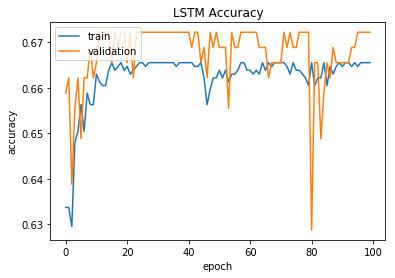

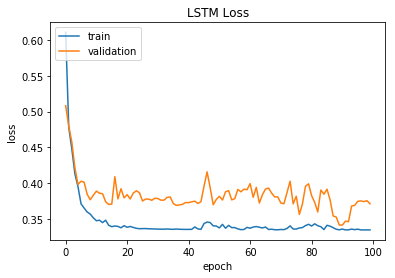

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()